##**Implement an RBF Network for Handwritten Character Recognition using the Kuzushiji dataset**

##Step 1: Import Required Libraries

In [22]:
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

##Step 2: Load and Preprocess Data

In [23]:
# Load the Kuzushiji-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0  # Flatten and normalize
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Convert labels to one-hot encoded format
encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_oh = encoder.transform(y_test.reshape(-1, 1))


Loading Data: The Kuzushiji dataset is loaded using TensorFlow's load_data() function.

Normalization: Pixel values range from 0 to 255. By dividing by 255, we normalize the data to a range of [0, 1]. This helps the model converge faster during training.

One-Hot Encoding: Labels are converted into one-hot encoded vectors (e.g., 3 → [0, 0, 1, 0, 0,...]) using OneHotEncoder. One-hot encoding is necessary for multi-class classification where each output neuron represents one class.

##Step 3: Define RBF Layer with Gaussian Basis Functions

In [24]:
def rbf_function(x, centers, beta):
    return np.exp(-beta * np.linalg.norm(x - centers, axis=1)**2)

# Define the number of RBF units
num_rbf_units = 100
kmeans = KMeans(n_clusters=num_rbf_units, random_state=0).fit(x_train)

# Get the centers of the RBF units
centers = kmeans.cluster_centers_

# Beta parameter for Gaussian functions (inverse of variance)
beta = 1.0 / (2.0 * np.mean(np.linalg.norm(centers - np.mean(centers, axis=0), axis=1))**2)


K-means Clustering: We use K-means to initialize the centers of the RBF units. K-means is an unsupervised learning algorithm that finds cluster centers, which are then used as centers for RBF units.

Beta: Controls the spread of the RBF units. A higher value of
𝛽
β causes narrower radial functions, while a lower value spreads them out.


##Step 4: Define the Feedforward Network and Forward Pass

In [25]:
# Forward pass through RBF layer
def rbf_layer(X, centers, beta):
    return np.array([rbf_function(x, centers, beta) for x in X])

# Softmax activation for output layer
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


Forward Pass through RBF Layer: The rbf_layer() function calculates the output of the RBF layer by applying the RBF function to each input sample and each RBF unit.

Softmax: Used in the output layer for multi-class classification. It converts raw output scores into probabilities for each class.

##Step 5: Training the RBF Network

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize random weights for the output layer
weights = np.random.randn(num_rbf_units, 10) * 0.01

# Learning rate and number of epochs
learning_rate = 0.01
epochs = 100

# Lists to store loss and accuracy values for plotting
loss_values = []
accuracy_values = []

# Training loop
for epoch in range(epochs):
    # Forward pass through RBF and softmax layers
    rbf_output = rbf_layer(x_train, centers, beta)
    logits = np.dot(rbf_output, weights)
    predictions = softmax(logits)

    # Compute cross-entropy loss
    loss = -np.mean(y_train_oh * np.log(predictions + 1e-8))
    loss_values.append(loss)  # Store loss

    # Calculate accuracy
    y_pred = np.argmax(predictions, axis=1)
    accuracy = np.mean(y_pred == np.argmax(y_train_oh, axis=1))
    accuracy_values.append(accuracy)  # Store accuracy

    # Backpropagation
    error = predictions - y_train_oh
    grad_weights = np.dot(rbf_output.T, error) / x_train.shape[0]

    # Update weights
    weights -= learning_rate * grad_weights

    # Print the loss and accuracy every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy}")

Epoch 0, Loss: 0.23006521248238132, Accuracy: 0.14688333333333334
Epoch 10, Loss: 0.22960181252770437, Accuracy: 0.1132
Epoch 20, Loss: 0.22915780535936753, Accuracy: 0.11236666666666667
Epoch 30, Loss: 0.22873116905171856, Accuracy: 0.11236666666666667
Epoch 40, Loss: 0.22832007606806967, Accuracy: 0.11236666666666667
Epoch 50, Loss: 0.22792287829746827, Accuracy: 0.11236666666666667
Epoch 60, Loss: 0.22753809291701163, Accuracy: 0.11236666666666667
Epoch 70, Loss: 0.22716438897330968, Accuracy: 0.11236666666666667
Epoch 80, Loss: 0.22680057463251826, Accuracy: 0.11236666666666667
Epoch 90, Loss: 0.22644558508322332, Accuracy: 0.11236666666666667


Weight Initialization: We randomly initialize the weights of the output layer.

Cross-Entropy Loss: This is used to measure the difference between the true labels and the predicted probabilities. It is commonly used for classification tasks.

Backpropagation: The gradient of the loss with respect to the weights is computed and used to update the weights using gradient descent.

##Step 6: Model Evaluation

Test Accuracy: 0.1135


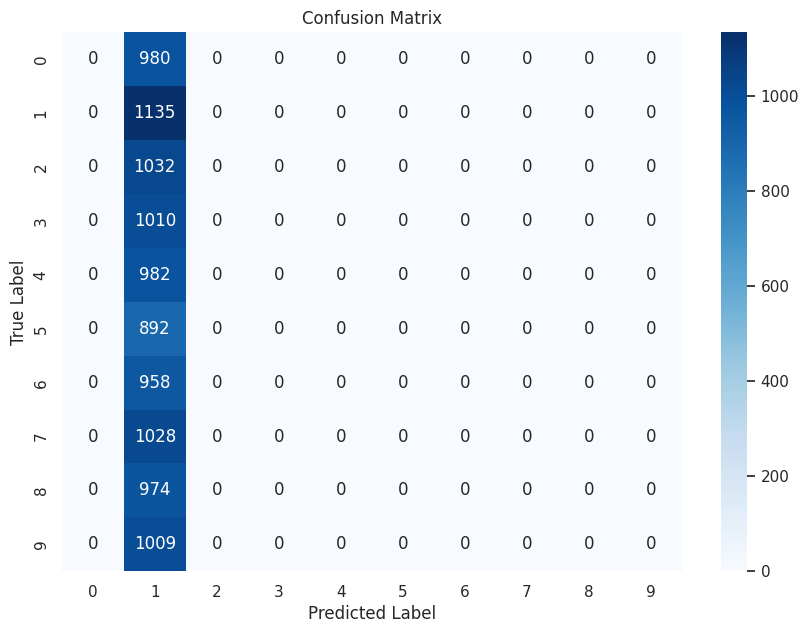

In [27]:
# Evaluate on the test set
rbf_output_test = rbf_layer(x_test, centers, beta)
logits_test = np.dot(rbf_output_test, weights)
predictions_test = softmax(logits_test)
y_pred = np.argmax(predictions_test, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Accuracy: The accuracy_score() function calculates how often the model predicts the correct label.

Confusion Matrix: Displays the true labels versus the predicted labels, giving insight into which classes are being confused.

Visualization: A confusion matrix is plotted for better understanding of the model’s classification performance.

##Step 7: Performance Analysis
Model Loss and Accuracy Over Epochs

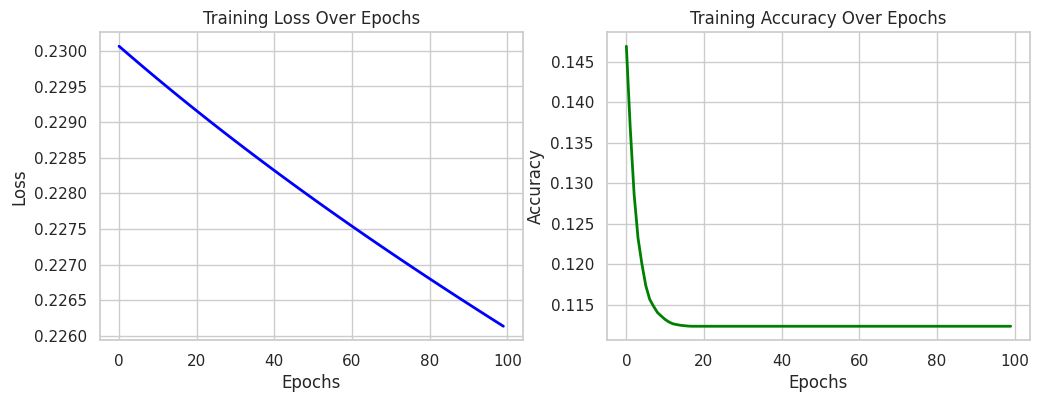

In [28]:
# Plot Training Loss and Accuracy over epochs
epochs_range = range(epochs)
plt.figure(figsize=(12, 4))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss_values, label='Training Loss', color='blue', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy_values, label='Training Accuracy', color='green', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')

plt.show()